In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results = pd.read_table(r"/work3/s220672/ORF_prediction/training_results", delimiter = ",")
results.head()

,Epoch,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy,Learning Rate,Weight Decay,Batch Size,Data Input,beta1,beta2
0,17,1.791648,0.180833,1.791178,0.211313,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
1,17,1.784922,0.171667,1.787345,0.167353,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
2,17,1.773385,0.227500,1.774585,0.205780,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
3,17,1.767266,0.226667,1.758390,0.281214,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
4,17,1.760260,0.252500,1.746602,0.324062,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN


In [4]:
import torch

from models.small_cnn import TheOneAndOnly

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Create an instance of the model
model = TheOneAndOnly(channels=6, test=False)

# Define the input shape
input_shape = (6, 30)

# Convert the model to the desired device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_parameters = count_parameters(model)

print("Number of parameters:", num_parameters)

Number of parameters: 15736738


In [38]:
import torch
from models.cnn_model import TheOneAndOnly

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Create an instance of the model
model = TheOneAndOnly(channels=6, test=False)

# Define the input shape
input_shape = (6, 30)

# Convert the model to the desired device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_parameters = count_parameters(model)

print("Number of parameters:", num_parameters)

Number of parameters: 34884256


In [7]:
epochs = list(range(1, 26))
epochs35 = list(range(1, 36))
bs_50 = results[results["Data Input"] == "6000frags_2000orgs_30nt_50"]["Validation Accuracy"]
bs_60 = results[results["Data Input"] == "6000frags_2000orgs_30nt_60"]["Validation Accuracy"]
bs_70 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70"]["Validation Accuracy"]
bs_110 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_110"]["Validation Accuracy"]
bs_130 = [0.6581764485514485, 0.7010414585414585, 0.7176523476523475, 0.7272599900099901, 0.7333741258741259, 0.7383104395604396, 0.743272977022977, 0.7462310189810191, 0.7510158591408591, 0.7545680569430571, 0.7574248251748252,
0.7613291708291708,
0.7640571928071929,
0.7674826423576424,
0.7711569680319681,
0.7737291458541458,
0.7767785964035964,
0.779633991008991,
0.7828787462537463,
0.7857818431568432,
0.7888987262737265,
0.792421078921079,
0.7943234265734267,
0.797014110889111,
0.8000812937062938]




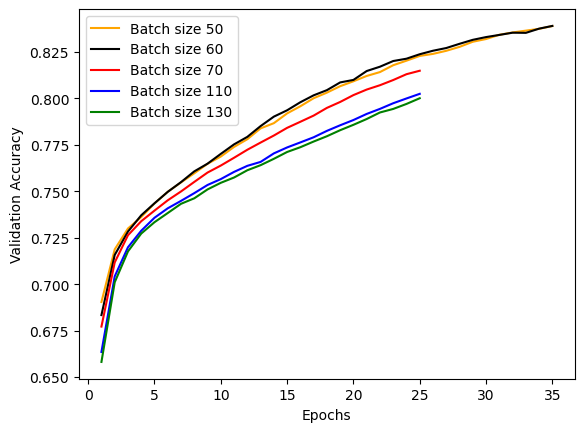

In [8]:
plt.plot(epochs35, bs_50, color='orange', label='Batch size 50')
plt.plot(epochs35, bs_60, color='black', label='Batch size 60')
plt.plot(epochs, bs_70, color='red', label='Batch size 70')
plt.plot(epochs, bs_110, color='blue', label='Batch size 110')
plt.plot(epochs, bs_130, color='green', label='Batch size 130')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

In [26]:
b299=results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70"]["Validation Accuracy"] 
b290 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70_06_09"]["Validation Accuracy"]
b280 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70_06_08"]["Validation Accuracy"]

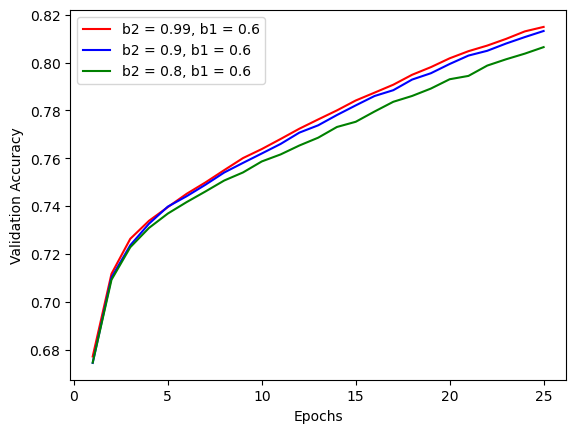

In [27]:
plt.plot(epochs, b299, color='red', label='b2 = 0.99, b1 = 0.6')
plt.plot(epochs, b290, color='blue', label='b2 = 0.9, b1 = 0.6')
plt.plot(epochs, b280, color='green', label='b2 = 0.8, b1 = 0.6')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

In [5]:
epochs = list(range(1, 26))
b102 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_02"]["Validation Accuracy"]
b104 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_04"]["Validation Accuracy"]
b106 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_06"]["Validation Accuracy"]
b108 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_08"]["Validation Accuracy"]
b1095 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_110"]["Validation Accuracy"]

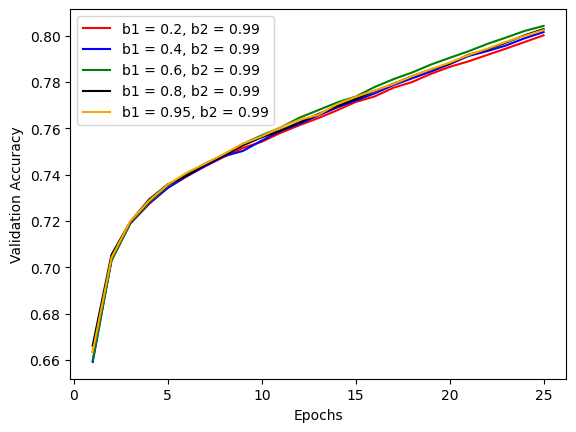

In [29]:
plt.plot(epochs, b102 , color='red', label='b1 = 0.2, b2 = 0.99')
plt.plot(epochs, b104, color='blue', label='b1 = 0.4, b2 = 0.99')
plt.plot(epochs, b106, color='green', label='b1 = 0.6, b2 = 0.99')
plt.plot(epochs, b108, color='black', label='b1 = 0.8, b2 = 0.99')
plt.plot(epochs, b1095, color='orange', label='b1 = 0.95, b2 = 0.99')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

Text(0.5, 1.0, 'Complexity of models')

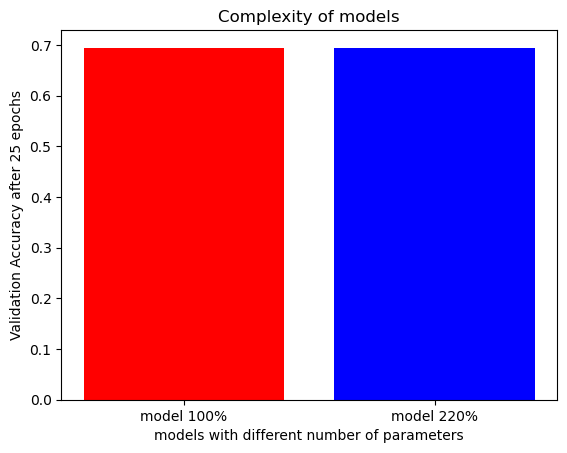

In [14]:
labels = ["model 100%","model 220%"]
val_accuracies = [0.6947112887112887 ,0.6935684315684315]
# Plotting the bar plot
plt.bar(labels, val_accuracies, color=['red', 'blue'],)
### 1000frags_5000orgs
# Adding labels and title
plt.xlabel('models with different number of parameters')
plt.ylabel('Validation Accuracy after 25 epochs')
plt.title('Complexity of models')

In [3]:
epochs = list(range(1, 26))
orgs10000_1000 = results[results["Data Input"] == "1000frags_10000orgs_b10.85_b20.95"]["Validation Accuracy"]
orgs5000_1000 = [0.4688557773067232,
0.5619938807343119,
0.5845042594888613,
0.5958598568171818,
0.6032746870375556,
0.6090032396112466,
0.6141533815942087,
0.6185721313442386,
0.6225703715554134,
0.6266522017357917,
0.630295484541855,
0.6343495980482343,
0.6379946806383233,
0.6415906491221053,
0.6454720233571971,
0.6489906411230653,
0.6526516817981841,
0.6563734751829781,
0.6597502299724034,
0.6631535415750109,
0.666411670599528,
0.6693687557493101,
0.6725796104467464,
0.6752519697636282,
0.6778378594568653
]
orgs2000_6000 = results[results["Data Input"] == "6000frags_2000orgs_again"]["Validation Accuracy"]
orgs2000_4000 = results[results["Data Input"] == "4000frags_2000orgs_30nt_70__"]["Validation Accuracy"]
orgs2000_8000 = results[results["Data Input"] == "8000frags_2000orgs_again"]["Validation Accuracy"]
orgs15000_1000 = results[results["Data Input"] == "1000frag_15000orgs_bs40"]["Validation Accuracy"]
orgs2500_2000 = results[results["Data Input"] == "2000frag_5000orgs_bs70"]["Validation Accuracy"]





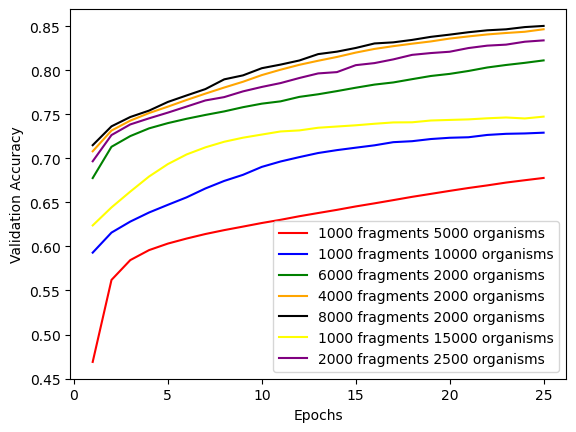

In [5]:
plt.plot(epochs, orgs5000_1000, color='red', label='1000 fragments 5000 organisms')
plt.plot(epochs, orgs10000_1000, color='blue', label='1000 fragments 10000 organisms')
plt.plot(epochs, orgs2000_6000, color='green', label='6000 fragments 2000 organisms')
plt.plot(epochs, orgs2000_4000, color='orange', label='4000 fragments 2000 organisms')
plt.plot(epochs, orgs2000_8000, color='black', label='8000 fragments 2000 organisms')
plt.plot(epochs, orgs15000_1000, color='yellow', label='1000 fragments 15000 organisms')
plt.plot(epochs, orgs2500_2000, color='purple', label='2000 fragments 2500 organisms')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

In [9]:

nucleotides39 = [0.7071312021312021, 0.7330965700965701, 0.7496809856809856, 0.7631441891441892, 0.7780735930735933, 0.7920652680652682, 0.8069710289710291, 0.8186613386613387, 0.828766233766234, 0.835751248751249, 0.8420599400599402, 0.8467785547785549, 0.8516923076923079, 0.8555394605394607, 0.8580043290043292, 0.8606550116550118, 0.8626693306693308, 0.8646829836829838, 0.8672590742590744, 0.8685864135864138, 0.8699873459873462, 0.8706993006993009, 0.8714871794871797, 0.872867132867133, 0.8741485181485182, 0.875795204795205, 0.875822843822844, 0.876887445887446, 0.877799866799867, 0.8786027306027309, 0.8785824175824177, 0.8794565434565437, 0.8794289044289045, 0.8801082251082252, 0.8800596070596072, 0.8817009657009658, 0.8819647019647022, 0.8822783882783884, 0.882795537795538, 0.8834878454878456, 0.882824508824509, 0.883838494838495, 0.8841874791874793, 0.8839916749916753, 0.8848361638361641]
nucleotides36 = [0.7016793206793207, 0.7282627372627373, 0.7436007326007327, 0.7566536796536797, 0.7687838827838829, 0.7813339993339995, 0.7954112554112556, 0.805939393939394, 0.8158458208458209, 0.8242987012987014, 0.8302977022977025, 0.8364299034299036, 0.8413712953712955, 0.8448281718281719, 0.8488594738594741, 0.8517052947052949, 0.8540599400599402, 0.8558947718947721, 0.8591545121545124, 0.860794871794872, 0.8623453213453215, 0.8640882450882453, 0.8652997002997005, 0.8666466866466869, 0.8674099234099235, 0.8675784215784219, 0.8691608391608393, 0.8698824508824511, 0.870833832833833, 0.871836163836164, 0.8728504828504831, 0.8734059274059276, 0.8734105894105896, 0.8735727605727608, 0.8744452214452216, 0.8751924741924744, 0.8753416583416586, 0.8757362637362639, 0.8759533799533802, 0.8768991008991012, 0.8774615384615386, 0.8782437562437565, 0.877863136863137, 0.8777728937728939, 0.8787229437229439]
nucleotides33 = [0.7078161838161837, 0.7354875124875124, 0.7521035631035632, 0.765928071928072, 0.7802870462870464, 0.7956963036963037, 0.810901431901432, 0.8220679320679322, 0.8312707292707294, 0.8384215784215786, 0.8452387612387615, 0.8499027639027641, 0.8544129204129206, 0.8557172827172829, 0.8609380619380622, 0.8635737595737598, 0.8655574425574427, 0.8664988344988348, 0.8680409590409592, 0.869822843822844, 0.8721605061605063, 0.8730702630702633, 0.8731798201798204, 0.8753969363969365, 0.8759084249084251, 0.8769237429237432, 0.8770496170496173, 0.8782387612387613, 0.8783766233766236, 0.878838161838162, 0.879772893772894, 0.880801864801865, 0.8813153513153515, 0.8810056610056612, 0.8816120546120548, 0.8820999000999002, 0.8825214785214787, 0.8834049284049286, 0.8836856476856478, 0.8842301032301033, 0.8846603396603399, 0.8843569763569765, 0.8845504495504497, 0.8846636696636698, 0.8853183483183485]
nucleotides30 = results[results["Data Input"] == "nodam_30nt"]["Validation Accuracy"]

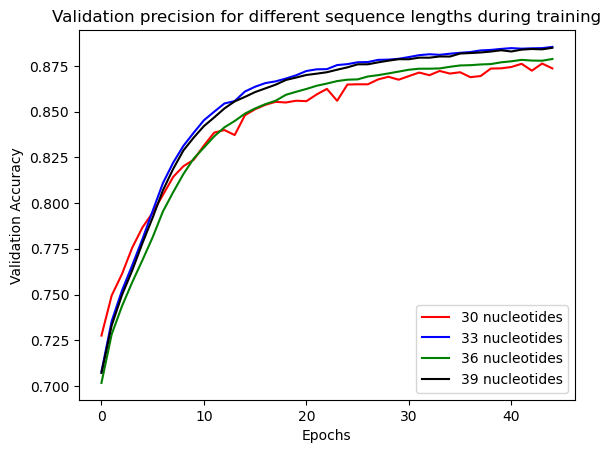

In [10]:
epochs39 = list(range(0, len(nucleotides30)))
plt.plot(epochs, nucleotides30, color='red', label='30 nucleotides')
plt.plot(epochs, nucleotides33, color='blue', label='33 nucleotides')
plt.plot(epochs, nucleotides36, color='green', label='36 nucleotides')
plt.plot(epochs, nucleotides39, color='black', label='39 nucleotides')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Validation precision for different sequence lengths during training")
# Adding legend
plt.legend()

In [5]:
relu = results[results["Data Input"] == "nodam_30nt"]["Validation Accuracy"]
leaky_relu = [0.6976976356976357, 0.7250446220446221, 0.7401341991341992, 0.7466679986679987, 0.7574039294039294, 0.768872793872794, 0.7776370296370297, 0.7898364968364969, 0.794791541791542, 0.8055657675657676, 0.8117219447219449, 0.8159823509823511, 0.8232307692307694, 0.8265497835497837, 0.8303779553779556, 0.8357825507825509, 0.8391988011988014, 0.837879786879787, 0.8394668664668666, 0.8464991674991676, 0.8471162171162173, 0.8510399600399603, 0.8531565101565103, 0.8495294705294708, 0.8554042624042626, 0.8577888777888779, 0.8577655677655679, 0.8557579087579089, 0.8615474525474527, 0.8606480186480189, 0.8633313353313355, 0.8613579753579754, 0.8643236763236766, 0.8634618714618716, 0.8606796536796539, 0.863870462870463, 0.866848151848152, 0.8662697302697304, 0.8691838161838163, 0.8672650682650683, 0.8707106227106227, 0.8686869796869799, 0.8709893439893442, 0.8667938727938729, 0.8723456543456546]
silu = [0.6980129870129869, 0.7244905094905094, 0.7381145521145521, 0.7431135531135532, 0.7528241758241758, 0.7652917082917083, 0.7734015984015984, 0.7840226440226441, 0.7925238095238096, 0.7996140526140528, 0.8061565101565104, 0.8137009657009658, 0.8196257076257079, 0.8252420912420914, 0.8287422577422578, 0.8298498168498171, 0.8357059607059608, 0.833819513819514, 0.8401308691308692, 0.8417735597735599, 0.842901764901765, 0.8476087246087248, 0.8521954711954713, 0.8507738927738928, 0.8478211788211789, 0.8546217116217117, 0.8540732600732603, 0.8542434232434234, 0.8548911088911091, 0.8576493506493509, 0.8611052281052283, 0.8590915750915753, 0.8619523809523811, 0.8637362637362639, 0.8654049284049287, 0.861718947718948, 0.8664165834165836, 0.8644362304362306, 0.8660469530469531, 0.8681142191142194, 0.8689244089244091, 0.8689410589410591, 0.8682903762903765, 0.8708701298701301, 0.8726923076923079]

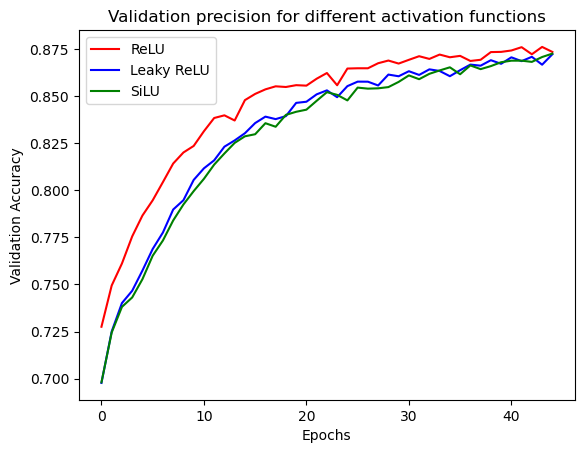

In [7]:
epochs = list(range(0, len(relu)))
plt.plot(epochs, relu, color='red', label='ReLU')
plt.plot(epochs, leaky_relu, color='blue', label='Leaky ReLU')
plt.plot(epochs, silu, color='green', label='SiLU')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Validation precision for different activation functions")
# Adding legend
plt.legend()

In [11]:
smallest = [0.4928418248418248, 0.5572037962037961, 0.6007822177822177, 0.6238504828504828, 0.6435161505161504, 0.6562577422577422, 0.6681445221445221, 0.6733193473193472, 0.6818091908091907, 0.6943569763569762, 0.700085581085581, 0.7004498834498833, 0.7104089244089243, 0.7138504828504828, 0.7164282384282384, 0.7234868464868465, 0.7256946386946388, 0.7252873792873792, 0.7325424575424575, 0.735065601065601, 0.7350765900765901, 0.7412690642690642, 0.7416436896436897, 0.7453686313686313, 0.7342131202131202, 0.7518854478854479, 0.7547848817848818, 0.7545314685314685, 0.7585168165168166, 0.7592127872127872, 0.7640592740592741, 0.7642171162171164, 0.7623749583749584, 0.766809190809191, 0.7648078588078588, 0.7684798534798535, 0.772027972027972, 0.7749000999000999, 0.7773286713286714, 0.775929403929404, 0.7774645354645355, 0.7802081252081252, 0.77894338994339, 0.784030636030636, 0.7782544122544124]
small = [0.572017316017316, 0.6416070596070597, 0.6673839493839493, 0.6809044289044288, 0.6843476523476523, 0.7040239760239759, 0.7123220113220113, 0.7150589410589412, 0.7192863802863803, 0.7268431568431568, 0.7329250749250749, 0.7365621045621045, 0.7408201798201798, 0.7436706626706626, 0.7488987678987679, 0.749067266067266, 0.7544075924075924, 0.7564232434232435, 0.759932400932401, 0.7628911088911089, 0.7685444555444556, 0.7697765567765569, 0.7721015651015651, 0.7773839493839494, 0.7790376290376291, 0.7824891774891776, 0.7850006660006661, 0.7880735930735931, 0.7906093906093907, 0.7920289710289712, 0.7943819513819516, 0.7925158175158177, 0.7972141192141193, 0.8006873126873129, 0.8019776889776892, 0.8031734931734933, 0.8058887778887781, 0.8086773226773228, 0.8069850149850152, 0.8124305694305696, 0.8135877455877458, 0.8147535797535799, 0.8172913752913755, 0.8186210456210458, 0.8178075258075259]
middle = [0.7012184482184483, 0.7189177489177488, 0.7395304695304695, 0.744980685980686, 0.7551162171162171, 0.7655487845487846, 0.7780476190476191, 0.7856540126540128, 0.795866466866467, 0.7964768564768565, 0.8091918081918084, 0.8153822843822844, 0.8193899433899435, 0.8233682983682985, 0.8283459873459875, 0.8313573093573094, 0.8357755577755579, 0.8380439560439562, 0.8395887445887447, 0.8424548784548787, 0.8435341325341327, 0.845837162837163, 0.846790542790543, 0.8513126873126875, 0.848874458874459, 0.8514805194805196, 0.855790875790876, 0.8572900432900435, 0.858765234765235, 0.8592307692307695, 0.8558624708624709, 0.8592587412587415, 0.8614422244422246, 0.8624838494838497, 0.8625577755577757, 0.8659597069597071, 0.8638225108225109, 0.867791874791875, 0.8644518814518817, 0.8672047952047954, 0.867792207792208, 0.869826173826174, 0.8682514152514155, 0.8680626040626043, 0.8709340659340662]
big = relu = results[results["Data Input"] == "nodam_30nt"]["Validation Accuracy"]

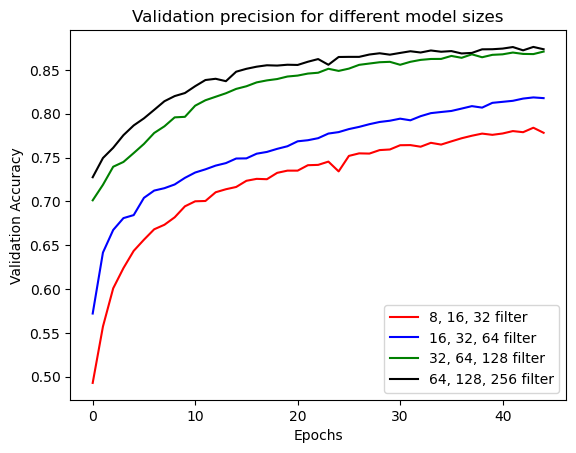

In [12]:
epochs = list(range(0, len(smallest)))
plt.plot(epochs, smallest, color='red', label='8, 16, 32 filter')
plt.plot(epochs, small, color='blue', label='16, 32, 64 filter')
plt.plot(epochs, middle, color='green', label='32, 64, 128 filter')
plt.plot(epochs, big, color='black', label='64, 128, 256 filter')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Validation precision for different model sizes")
# Adding legend
plt.legend()